# Credit Card Approval Data Set

# 1.0 Background

The first dataset i.e. Application record contains 438,557 entries entries with 18 columns while the second data set i.e. Credit record contains 1,048,575 entries and 3 columns. The data sets were obtained from Kaggle.

The 2 data sets used contain informative data on applicants creditworthiness;

1. Application record (contains general information about applicant, such as applicant gender, DOB, education type, assets that applicant had, etc.)

2. Credit record (contains applicant's loan payment records) i.e status

The data sources;

Both data sets available here; https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# 2.0 Objectives

The objectives of the analysis are as follows:

1. To explore the distribution and attributes of the general applicant information via data visualisations.

2. To illustrate the relationship between income and loan status.

3. To demonstrate whether employment length period has an impact on loan status.

# 3.0 Data

In [177]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [108]:
# Loading the first data set
carddata = pd.read_csv("C:/Users/kinyanjuim/Desktop/H2_Projects_2023/Credit-Card-Approval-Prediction/data/application_record.csv")

In [109]:
# Loading the second data set
creditdata = pd.read_csv("C:/Users/kinyanjuim/Desktop/H2_Projects_2023/Credit-Card-Approval-Prediction/data/credit_record.csv")

In [110]:
# Overview of the carddata columns
print(carddata.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')


In [111]:
# Overview of the creditdata columns
print(creditdata.columns)

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [112]:
# Information about attributes
carddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [113]:
# Information about attributes
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [114]:
# First 5 rows
carddata.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [115]:
creditdata.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [116]:
# Checking for duplicates
carddata['ID'].nunique()
# We have 47 duplicates


438510

In [117]:
# Checking for duplicates
creditdata['ID'].nunique()
# We have quite a number of duplicates; almost a million


45985

In [119]:
# Merging the data on ID

mergeddata = pd.merge(carddata, creditdata, on = 'ID', how = 'inner')
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [120]:
# Checking for duplicates
mergeddata['ID'].nunique()
# We have quite a number of duplicates; almost a million

36457

In [121]:
# Now, we remove duplicates

mergeddata = mergeddata.drop_duplicates('ID', keep='first')
mergeddata.info()

# For credibility, we will double-check the data and see the total number of rows. There should be 36457

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

In [122]:
# Missing Values
# Only Occupation Type has 134,187 missing values

missing = mergeddata.isnull().sum()
missing

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [123]:
# Education Level Count
mergeddata['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

In [124]:
# Dealing with missing values
# Drpping null values in occupation type
modifieddata = mergeddata.dropna()
modifieddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 31 to 777701
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  FLAG_MOBIL           25134 non-null  int64  
 13  FLAG_WORK_PHONE      25134 non-null  int64  
 14  FLAG_PHONE           25134 non-null  int64  
 15  FLAG_EMAIL           25134 non-nul

In [125]:
# Also drop columns that are likely to not affect whether credit worthiness of an individual
# i.e. FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL
modifieddata.drop(columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace = True)
modifieddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 31 to 777701
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  OCCUPATION_TYPE      25134 non-null  object 
 13  CNT_FAM_MEMBERS      25134 non-null  float64
 14  MONTHS_BALANCE       25134 non-null  int64  
 15  STATUS               25134 non-nul

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1212\3143066085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modifieddata.drop(columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace = True)


In [126]:
# Exploratory Analysis
# Men and Women that own cars
modifieddata.groupby(['CODE_GENDER', 'FLAG_OWN_CAR'])['ID'].count()

CODE_GENDER  FLAG_OWN_CAR
F            N               11141
             Y                4489
M            N                3477
             Y                6027
Name: ID, dtype: int64

In [127]:
# Men and Women and their various education types
modifieddata.groupby(['NAME_EDUCATION_TYPE','CODE_GENDER'])['ID'].count()

NAME_EDUCATION_TYPE            CODE_GENDER
Academic degree                F                 12
                               M                  2
Higher education               F               4690
                               M               2442
Incomplete higher              F                600
                               M                393
Lower secondary                F                 98
                               M                 89
Secondary / secondary special  F              10230
                               M               6578
Name: ID, dtype: int64

In [128]:
# Count per family status
a = modifieddata['NAME_FAMILY_STATUS'].value_counts()
# Count per housing type
b = modifieddata['NAME_HOUSING_TYPE'].value_counts()
# Count per gender
c = modifieddata['CODE_GENDER'].value_counts()
# Count per car ownership
d = modifieddata['FLAG_OWN_CAR'].value_counts()
# Count per realty ownership
e = modifieddata['FLAG_OWN_REALTY'].value_counts()
# Count per income type
f = modifieddata['NAME_INCOME_TYPE'].value_counts()
# Count per occupation type
g = modifieddata['OCCUPATION_TYPE'].value_counts()

print('\n',a,'\n\n', b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: NAME_FAMILY_STATUS, dtype: int64 

 House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: NAME_HOUSING_TYPE, dtype: int64 

 F    15630
M     9504
Name: CODE_GENDER, dtype: int64 

 N    14618
Y    10516
Name: FLAG_OWN_CAR, dtype: int64 

 Y    16461
N     8673
Name: FLAG_OWN_REALTY, dtype: int64 

 Working                 15622
Commercial associate     7052
State servant            2437
Pensioner                  13
Student                    10
Name: NAME_INCOME_TYPE, dtype: int64 

 Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff 

# 4.0 Data Visualization

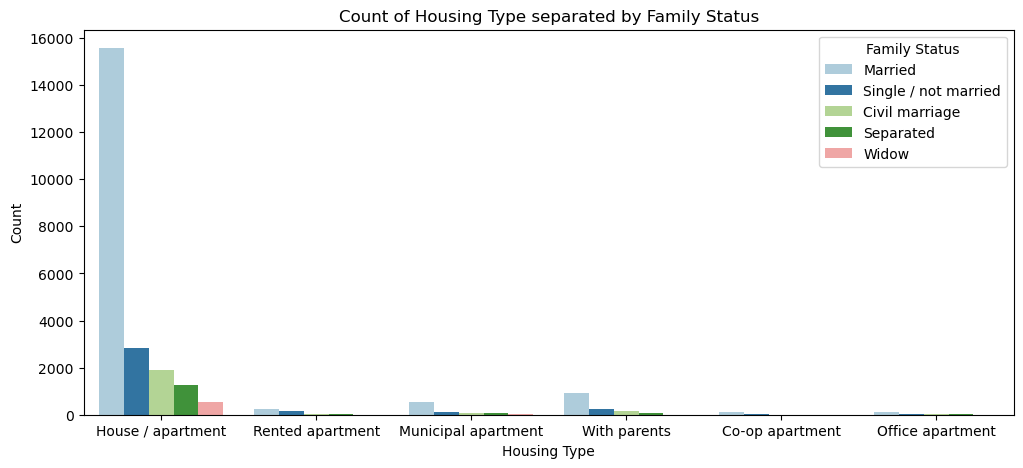

In [129]:
# Count distribution of family status and housing type
plt.figure(figsize=(12,5))

sns.countplot(x='NAME_HOUSING_TYPE',data=modifieddata, palette='Paired',hue='NAME_FAMILY_STATUS')
plt.title("Count of Housing Type separated by Family Status")
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.legend(title='Family Status')
# Most people live in a house/ apartment

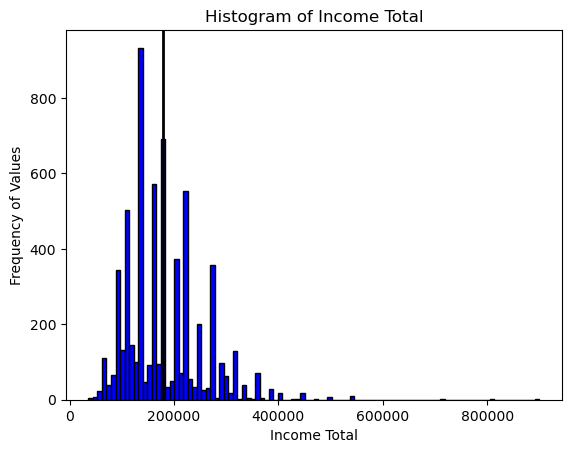

In [130]:
# How does the income of the laborers look like?

labincome = modifieddata.loc[modifieddata['OCCUPATION_TYPE'] == 'Laborers']
labincome.tail()

# Histogram distribution of income
plt.ticklabel_format(style='plain')

plt.hist(labincome['AMT_INCOME_TOTAL'], bins = 100, color = "blue", edgecolor = 'black')

plt.xlabel('Income Total')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Income Total')

# Mean of Income
plt.axvline(labincome['AMT_INCOME_TOTAL'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers


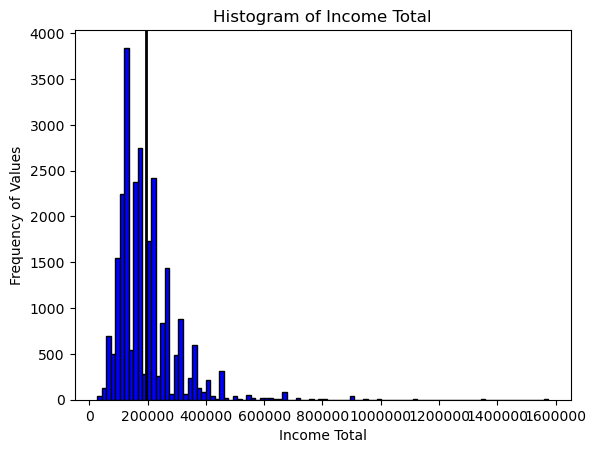

In [131]:
# How does the income look like

# Histogram distribution of income
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['AMT_INCOME_TOTAL'], bins = 100, color = "blue", edgecolor = 'black')

plt.xlabel('Income Total')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Income Total')

# Mean of Income
plt.axvline(modifieddata['AMT_INCOME_TOTAL'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers

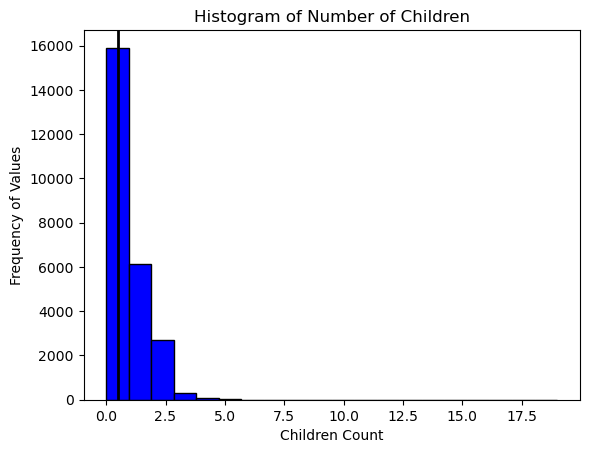

In [132]:
# How does the number of children look like?

# Histogram distribution of income
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['CNT_CHILDREN'], bins = 20, color = "blue", edgecolor = 'black')

plt.xlabel('Children Count')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Number of Children')

# Mean of Children Count
plt.axvline(modifieddata['CNT_CHILDREN'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers

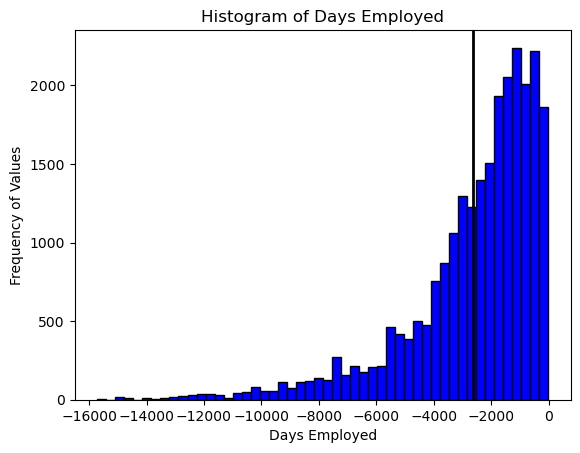

In [133]:
# How does the days employed look like?

# Histogram distribution of days employed
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['DAYS_EMPLOYED'], bins = 50, color = "blue", edgecolor = 'black')

plt.xlabel('Days Employed')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Days Employed')

# Mean of days employed
plt.axvline(modifieddata['DAYS_EMPLOYED'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers

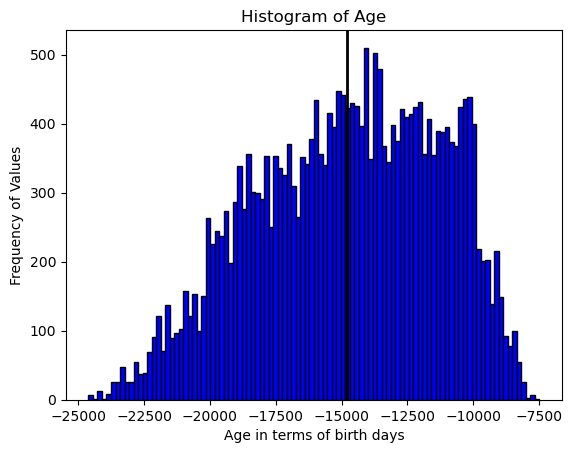

In [134]:
# How old are the individuals in the data set and distribution

# Histogram distribution of age
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['DAYS_BIRTH'], bins = 100, color = "blue", edgecolor = 'black')

plt.xlabel('Age in terms of birth days')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Age')

# Mean of age
plt.axvline(modifieddata['DAYS_BIRTH'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers

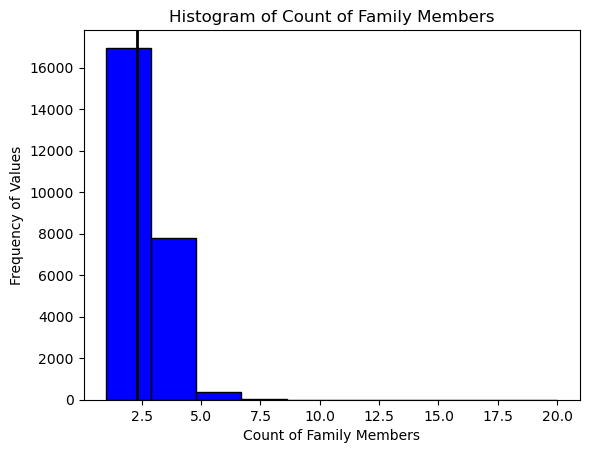

In [135]:
# Family Size

# Histogram distribution of family size
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['CNT_FAM_MEMBERS'], bins = 10, color = "blue", edgecolor = 'black')

plt.xlabel('Count of Family Members')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Count of Family Members')

# Mean of family size
plt.axvline(modifieddata['CNT_FAM_MEMBERS'].mean(), color = "black", linewidth = 2)
plt.show()

# Possibility of outliers

In [142]:
# Changing Days of Birth to positive

modifieddata['DAYS_BIRTH'] = abs(modifieddata['DAYS_BIRTH'])
modifieddata['DAYS_BIRTH'].head()

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1212\2971457499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modifieddata['DAYS_BIRTH'] = abs(modifieddata['DAYS_BIRTH'])


31    21474
61    19110
66    19110
71    19110
98    19110
Name: DAYS_BIRTH, dtype: int64

In [143]:
# Creating a new column for Years based on days of birth
# Assuming one year has 365 days
# round function returns the age to 1 decimal place

modifieddata['AGE_YEARS'] = round(modifieddata['DAYS_BIRTH']/365, 1)
modifieddata['AGE_YEARS'].head()

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1212\3143123118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modifieddata['AGE_YEARS'] = round(modifieddata['DAYS_BIRTH']/365, 1)


31    58.8
61    52.4
66    52.4
71    52.4
98    52.4
Name: AGE_YEARS, dtype: float64

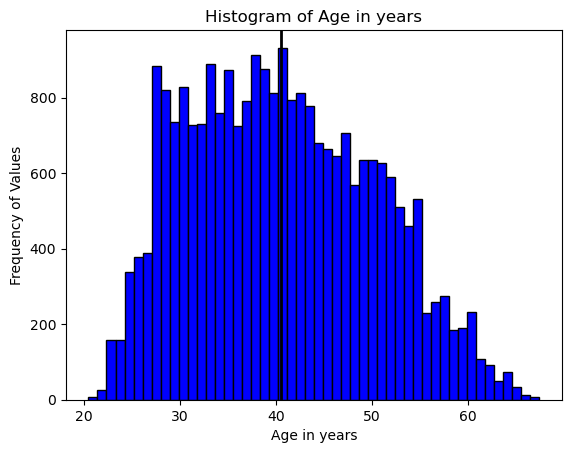

The minimum age is 20.5 years while the maximum age is 67.4 years


In [144]:
# Distribution of the new column Age_Years
# How old are the individuals in the data set and distribution

# Histogram distribution of age
plt.ticklabel_format(style='plain')

plt.hist(modifieddata['AGE_YEARS'], bins = 50, color = "blue", edgecolor = 'black')

plt.xlabel('Age in years')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Age in years')

# Mean of age
plt.axvline(modifieddata['AGE_YEARS'].mean(), color = "black", linewidth = 2)
plt.show()

minage = modifieddata['AGE_YEARS'].min()
maxage= modifieddata['AGE_YEARS'].max()

print('The minimum age is', minage, 'years', 'while the maximum age is', maxage, 'years')

# Exploring Correlations

C:\Users\kinyanjuim\AppData\Local\Temp\ipykernel_1212\698445210.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = modifieddata.corr()


<Axes: >

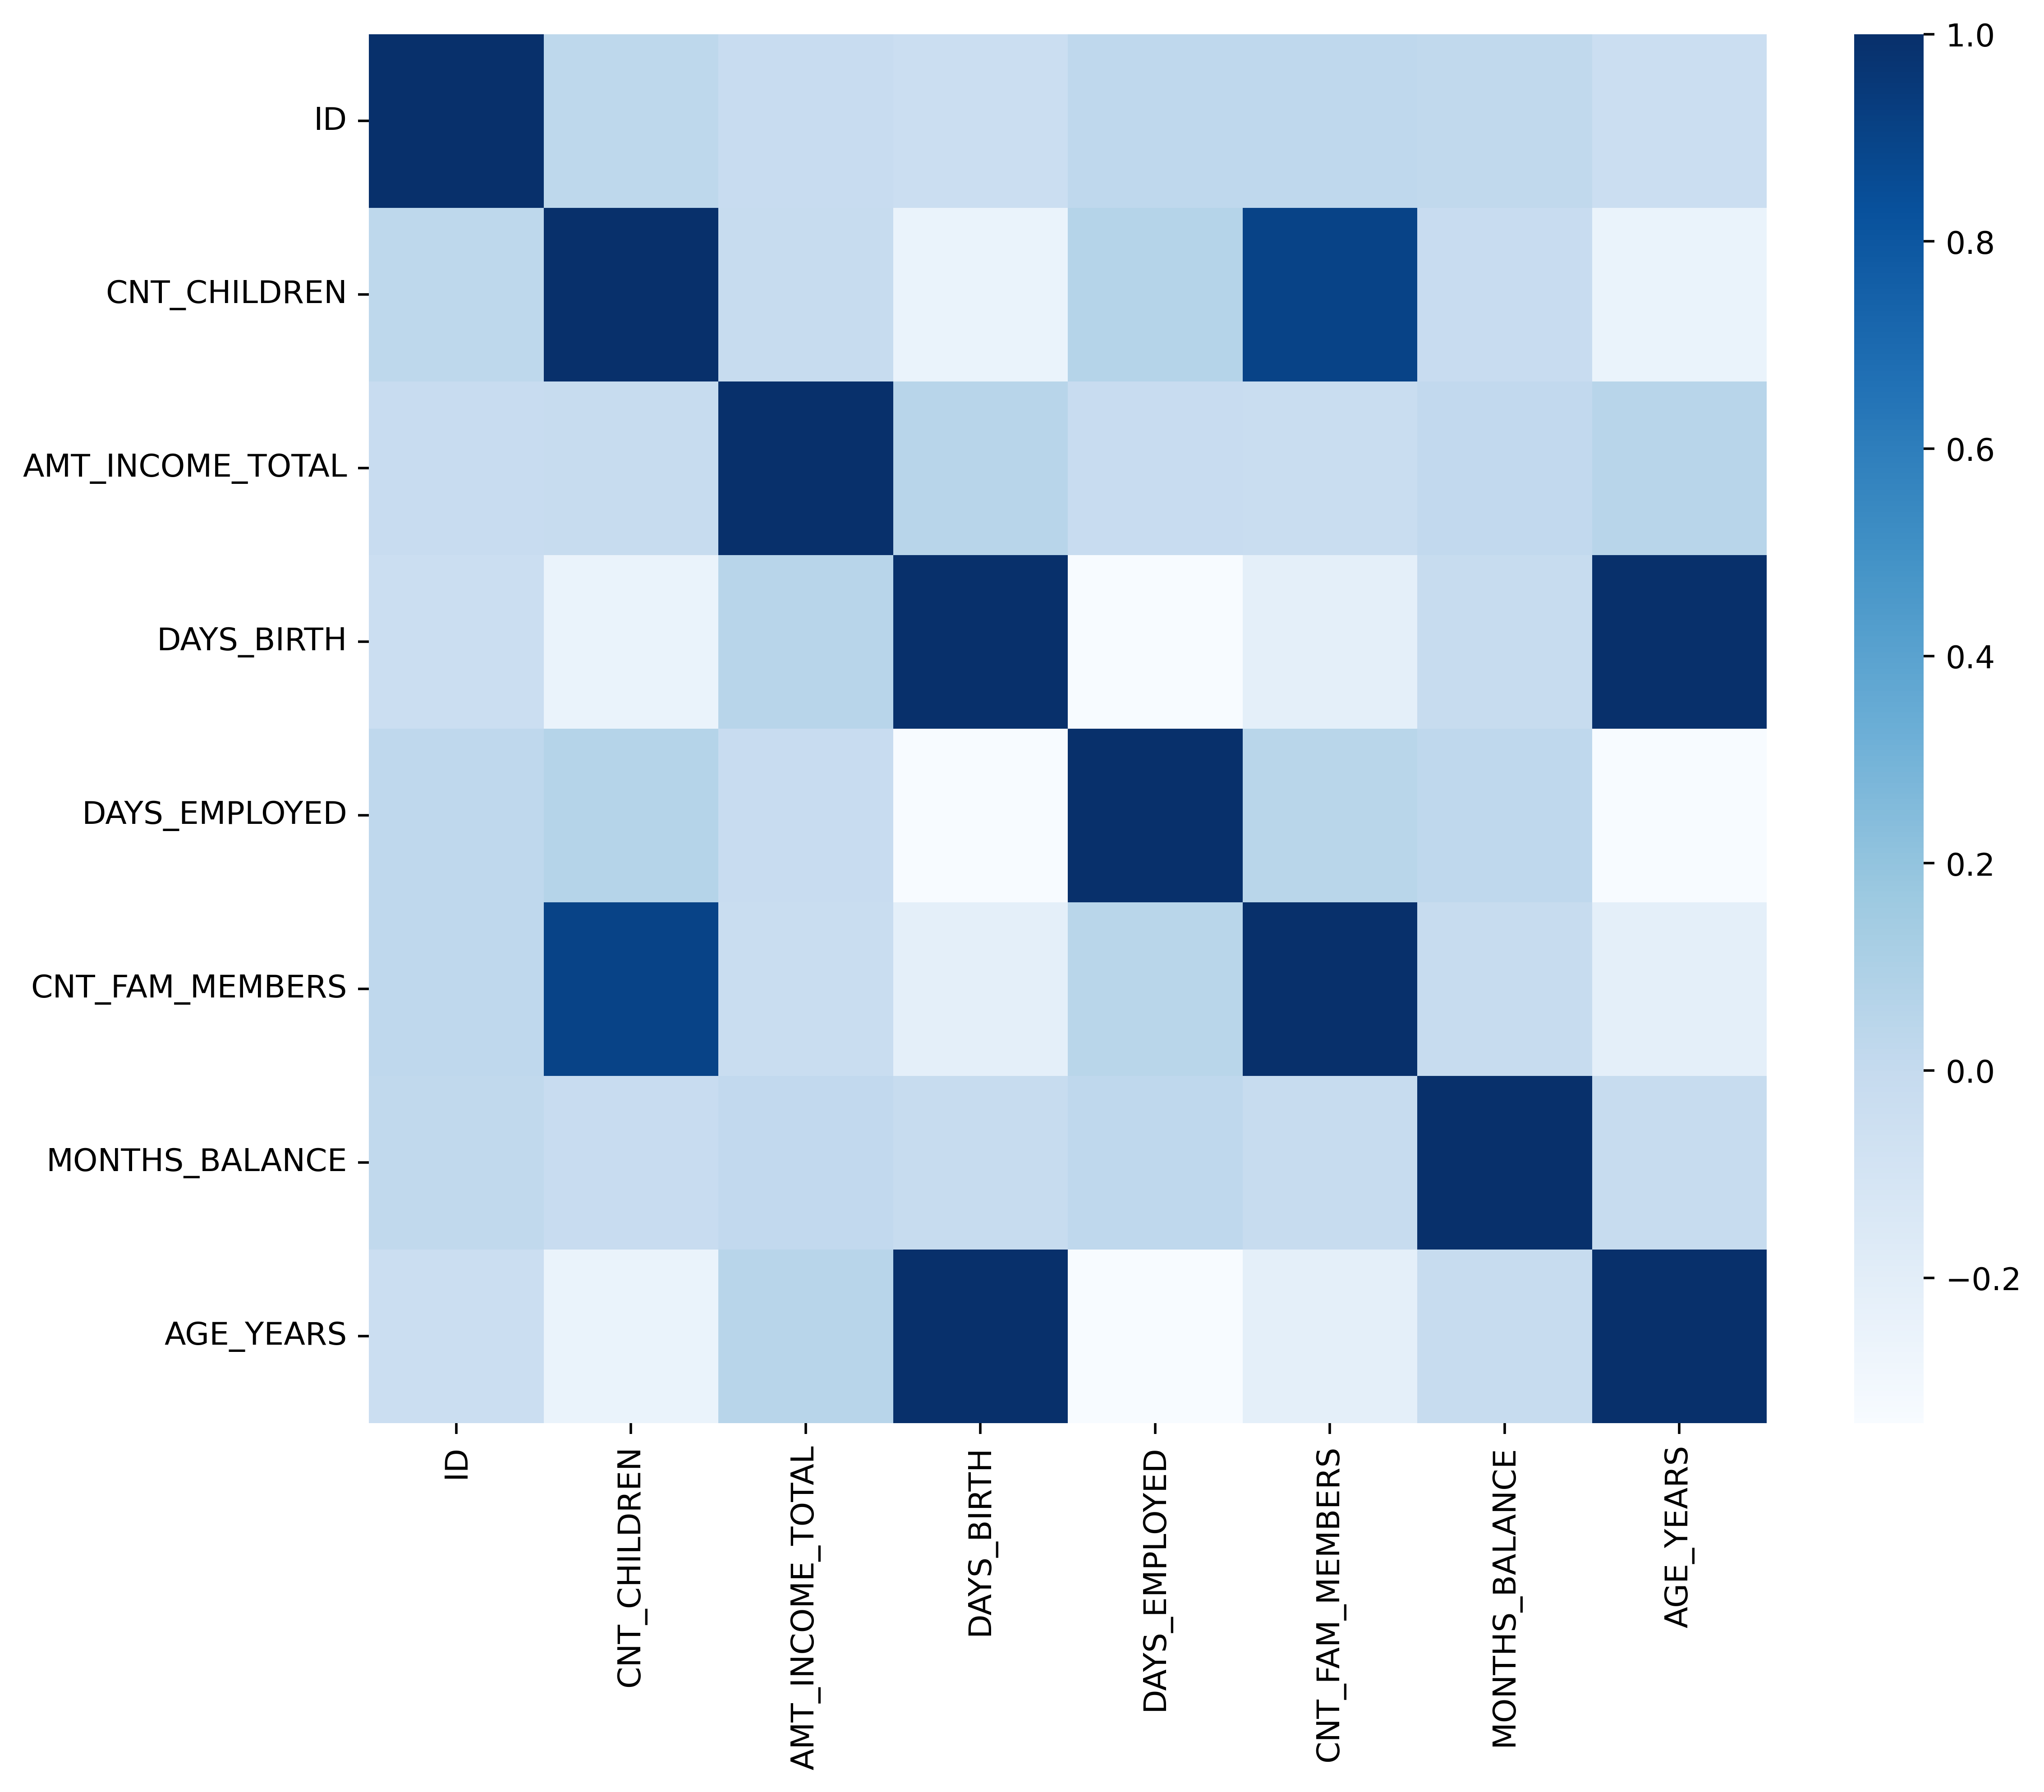

In [155]:
# Correlation Heat Map

import seaborn as sb
dfCorr = modifieddata.corr()
#filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.5))]
plt.figure(figsize=(10,8), dpi =500)
sb.heatmap(dfCorr, cmap="Blues", annot=False)

In [149]:
# 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 
# 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month X: No loan for the month
mergeddata['STATUS'].value_counts()

C    17950
X     9669
0     8456
1      276
5       76
2       19
3        6
4        5
Name: STATUS, dtype: int64

In [151]:
modifieddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 31 to 777701
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25134 non-null  int64  
 1   CODE_GENDER          25134 non-null  object 
 2   FLAG_OWN_CAR         25134 non-null  object 
 3   FLAG_OWN_REALTY      25134 non-null  object 
 4   CNT_CHILDREN         25134 non-null  int64  
 5   AMT_INCOME_TOTAL     25134 non-null  float64
 6   NAME_INCOME_TYPE     25134 non-null  object 
 7   NAME_EDUCATION_TYPE  25134 non-null  object 
 8   NAME_FAMILY_STATUS   25134 non-null  object 
 9   NAME_HOUSING_TYPE    25134 non-null  object 
 10  DAYS_BIRTH           25134 non-null  int64  
 11  DAYS_EMPLOYED        25134 non-null  int64  
 12  OCCUPATION_TYPE      25134 non-null  object 
 13  CNT_FAM_MEMBERS      25134 non-null  float64
 14  MONTHS_BALANCE       25134 non-null  int64  
 15  STATUS               25134 non-nul

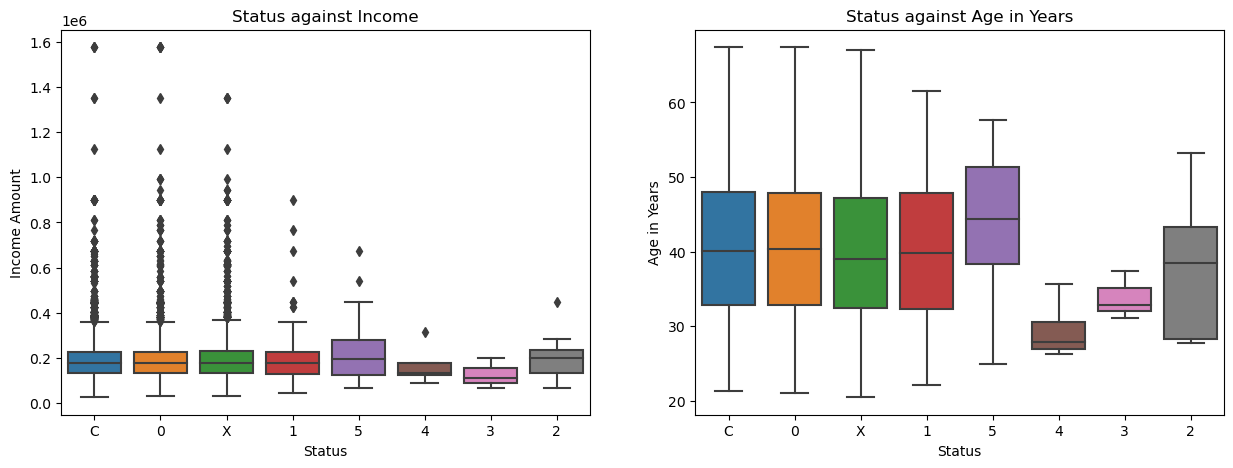

In [157]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=modifieddata["STATUS"],
    y=modifieddata["AMT_INCOME_TOTAL"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=modifieddata["STATUS"],
    y=modifieddata["AGE_YEARS"],
    ax=ax2
)

# Customize labels
ax1.set_title('Status against Income')
ax1.set_xlabel('Status')
ax1.set_ylabel("Income Amount")
ax2.set_title('Status against Age in Years')
ax2.set_xlabel('Status')
ax2.set_ylabel("Age in Years");

# Outliers noted in first graph
# Majority of old debt is from incomes of between 100,000 - 500,000

In [166]:
# Days employed
# Make a new column
employed = modifieddata.loc[modifieddata['DAYS_EMPLOYED'] < 0]
employed['DAYS_EMPLOYED'].head()

employed['DAYS_EMPLOYED'] = abs(employed['DAYS_EMPLOYED'])
employed['DAYS_EMPLOYED'].head()

employed['EMP_YEARS'] = round(employed['DAYS_EMPLOYED']/365, 1)
employed['EMP_YEARS'].head()


31    3.1
61    8.4
66    8.4
71    8.4
98    8.4
Name: EMP_YEARS, dtype: float64

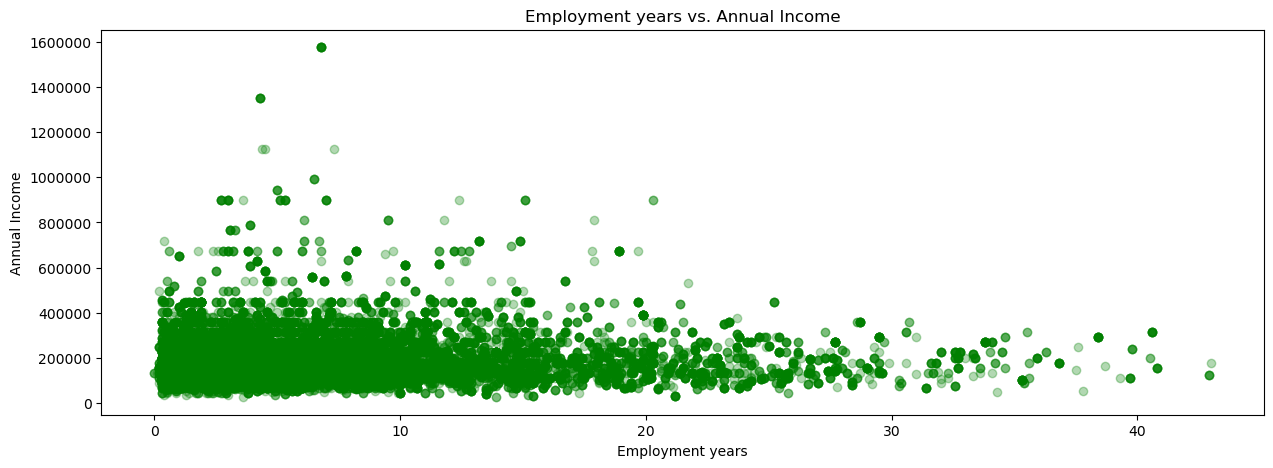

In [170]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Change amounts to original instead of le6
plt.ticklabel_format(style='plain')

# Plot Age vs. Income
ax.scatter(employed["EMP_YEARS"], employed["AMT_INCOME_TOTAL"], alpha=0.3, color="green")
ax.set_title("Employment years vs. Annual Income")
ax.set_xlabel("Employment years")
ax.set_ylabel("Annual Income");

# Length of employment doesn't necessary mean a higher annual income


In [182]:
# Interactive Scatter Plot of Years in Employment against Annual Income
df = employed
fig = px.scatter(df, employed["EMP_YEARS"], employed["AMT_INCOME_TOTAL"],
                 color="OCCUPATION_TYPE",
                 hover_data=['EMP_YEARS', 'AMT_INCOME_TOTAL'], 
                 title = "Years in Employment against Annual Income")
fig.show()

In [189]:
employed["EMP_YEARS"] = employed["EMP_YEARS"].astype(int)

In [202]:
# Create pandas DataFrame Subset Based on Logical Condition

zero = employed.loc[employed['STATUS'] == '0']
print(zero)

one = employed.loc[employed['STATUS'] == '1']
print(one)

two = employed.loc[employed['STATUS'] == '2']
print(two)

three = employed.loc[employed['STATUS'] == '3']
print(three)

four = employed.loc[employed['STATUS'] == '4']
print(four)

five = employed.loc[employed['STATUS'] == '5']
print(five)

C = employed.loc[employed['STATUS'] == 'C']
print(C)

X = employed.loc[employed['STATUS'] == 'X']
print(X)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
61      5008808           F            N               Y             0   
188     5008815           M            Y               Y             0   
277     5008824           M            Y               Y             0   
281     5008825           F            Y               N             0   
621     5008841           M            N               Y             1   
...         ...         ...          ...             ...           ...   
777058  5143574           M            Y               N             0   
777075  5143576           M            Y               N             0   
777097  5143578           M            Y               N             0   
777357  5148694           F            N               N             0   
777701  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
61              270000.0  Comm

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
768484  5009524           M            Y               N             1   
773026  5089433           F            Y               N             2   
773404  5091281           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
768484          112500.0          Working  Secondary / secondary special   
773026           67500.0          Working  Secondary / secondary special   
773404          202500.0          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
768484          Separated      Co-op apartment       11998           1135   
773026            Married  Municipal apartment       11352           1160   
773404            Married    House / apartment       13645           5374   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  AGE_YEARS  \
768484      

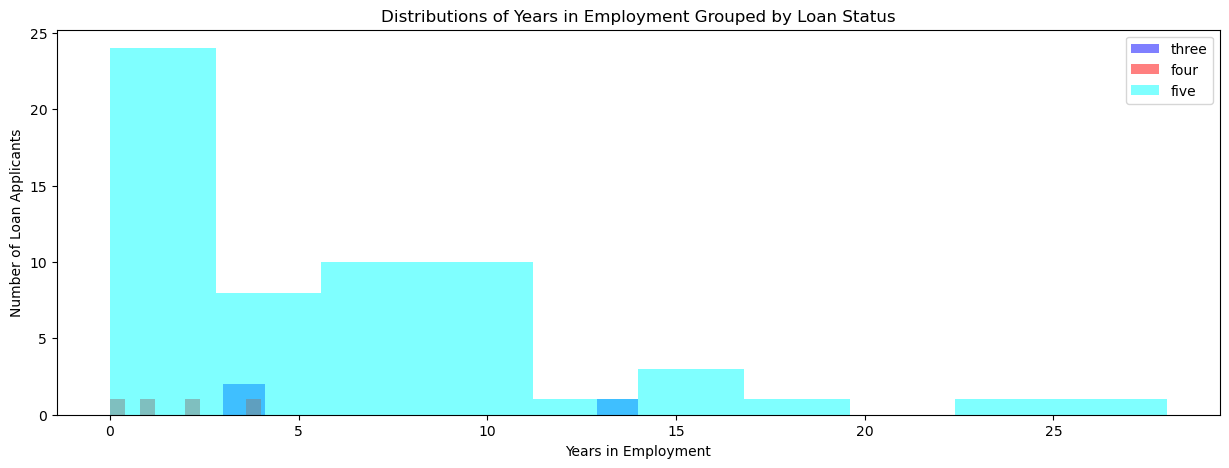

In [215]:
# Does years of employment have an impact on loan status

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot loan statuses of over 90 days
# can see them overlapping
ax.hist(
    x=three["EMP_YEARS"],
    label="three",
    bins = 10,
    color="blue",
    alpha=0.5
)
ax.hist(
    x=four["EMP_YEARS"],
    label="four",
    bins = 10,
    color="red",
    alpha=0.5
)
ax.hist(
    x=five["EMP_YEARS"],
    label="five",
    bins = 10,
    color="cyan",
    alpha=0.5
)
# Customize labels
ax.set_title("Distributions of Years in Employment Grouped by Loan Status")
ax.set_xlabel("Years in Employment")
ax.set_ylabel("Number of Loan Applicants")
ax.legend();

# Most applicants with bad debt are on the 0-5 range of years in employment

# 5.0 Conclusion

1. There is a higher number of females than with academic degrees and secondary education.

2. Majority of old debt is from incomes of between 100,000 - 500,000. Income does have an impact on proportion of bad debt

3. Most applicants with bad debt are on the 0-5 range of years in employment

# 6.0 Recommendations

1. Financial services industry eg banks, insurance – Provision of more loan data to facilitate credit scoring techniques e.g.
FICO score. 

Beneficiaries of the results/ outcome from the project;

1. Financial services industry eg banks, insurance.
2. Credit Reference Bureau
